In [29]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [3]:
tickets_df = pd.read_excel('input_data.xlsx')
print(tickets_df.shape)
tickets_df.head()

(8500, 4)


,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


### Exploratory Data Analysis

1. Dataset has 8500 rows and 4 columns
2. 'Short description' has 8 empty values and 'Description' has 1 empty value
3. There are 7818 unique 'Description' entries and 74 unique entries for 'Assignment group'
4. ~47% of the entries under 'Assignment group' belong to GRP_0

In [4]:
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Short description    8492 non-null object
Description          8499 non-null object
Caller               8500 non-null object
Assignment group     8500 non-null object
dtypes: object(4)
memory usage: 265.7+ KB


In [5]:
(tickets_df.isna() == True).sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [9]:
#finding unique data
tickets_df.apply(lambda x: len(x.unique()))

Short description    7482
Description          7818
Caller               2950
Assignment group       74
dtype: int64

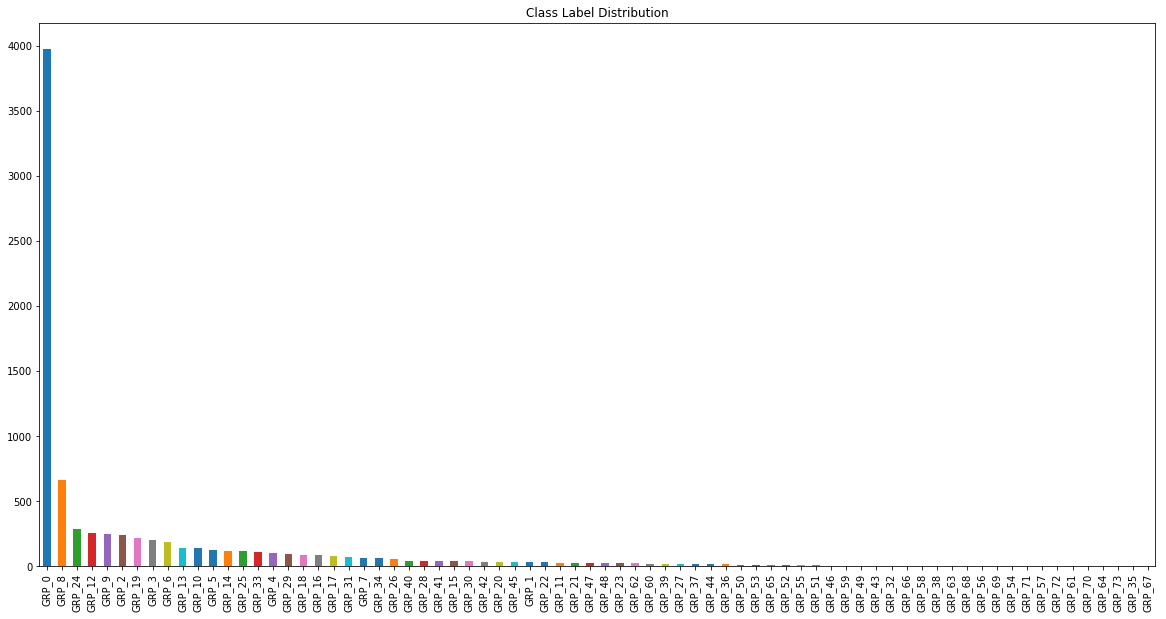

In [6]:
tickets_df['Assignment group'].value_counts().plot(kind='bar', figsize=(20,10), title='Class Label Distribution')

In [7]:
tickets_df['Assignment group'].value_counts(normalize = True)

GRP_0     0.467765
GRP_8     0.077765
GRP_24    0.034000
GRP_12    0.030235
GRP_9     0.029647
GRP_2     0.028353
GRP_19    0.025294
GRP_3     0.023529
GRP_6     0.021647
GRP_13    0.017059
GRP_10    0.016471
GRP_5     0.015176
GRP_14    0.013882
GRP_25    0.013647
GRP_33    0.012588
GRP_4     0.011765
GRP_29    0.011412
GRP_18    0.010353
GRP_16    0.010000
GRP_17    0.009529
GRP_31    0.008118
GRP_7     0.008000
GRP_34    0.007294
GRP_26    0.006588
GRP_40    0.005294
GRP_28    0.005176
GRP_41    0.004706
GRP_15    0.004588
GRP_30    0.004588
GRP_42    0.004353
            ...   
GRP_44    0.001765
GRP_36    0.001765
GRP_50    0.001647
GRP_53    0.001294
GRP_65    0.001294
GRP_52    0.001059
GRP_55    0.000941
GRP_51    0.000941
GRP_46    0.000706
GRP_59    0.000706
GRP_49    0.000706
GRP_43    0.000588
GRP_32    0.000471
GRP_66    0.000471
GRP_58    0.000353
GRP_38    0.000353
GRP_63    0.000353
GRP_68    0.000353
GRP_56    0.000353
GRP_69    0.000235
GRP_54    0.000235
GRP_71    0.

### Data Pre Processing

In [10]:
# Combine short and long description
tickets_df['RawDescription'] = tickets_df['Short description'].str.cat(tickets_df['Description'], sep=' ', na_rep=' ')
tickets_df.head()

,Short description,Description,Caller,Assignment group,RawDescription
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


In [11]:
# Find word counts
tickets_df['RawWordCount'] = [len(desc.split(' ')) for desc in tickets_df['RawDescription']]
tickets_df.head()

,Short description,Description,Caller,Assignment group,RawDescription,RawWordCount
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,6


In [12]:
wordCount_before = tickets_df['RawWordCount'].sum()
print("Total Corpus Word Count: ", wordCount_before)

Total Corpus Word Count:  307616


In [13]:
# Regex based cleaning for RawDescription
def removeString(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

def cleanDataset(dataset, columnsToClean, regexList):
    for column in columnsToClean:
        for regex in regexList:
            dataset[column] = removeString(dataset[column], regex)
    return dataset

def getRegexList():
    '''
    Adding regex list as per the given data set to flush off the unnecessary text
    
    '''
    regexList = []
    regexList += ['From:(.*)\r\n']  # from line
    regexList += ['Sent:(.*)\r\n']  # sent to line
    regexList += ['received from:(.*)\r\n']  # received data line
    regexList += ['received']  # received data line
    regexList += ['To:(.*)\r\n']  # to line
    regexList += ['CC:(.*)\r\n']  # cc line
    regexList += ['(.*)infection']  # footer
    regexList += ['\[cid:(.*)]']  # images cid
    regexList += ['https?:[^\]\n\r]+']  # https & http
    regexList += ['Subject:']
    regexList += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+']  # emails are not required
    regexList += ['[0-9][\-0–90-9 ]+']  # phones are not required
    regexList += ['[0-9]']  # numbers not needed
    regexList += ['[^a-zA-z 0-9]+']  # anything that is not a letter
    regexList += ['[\r\n]']  # \r\n
    regexList += [' [a-zA-Z] ']  # single letters makes no sense
    regexList += [' [a-zA-Z][a-zA-Z] ']  # two-letter words makes no sense
    regexList += ["  "]  # double spaces
    
    regexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$']
    regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regexList += ['Subject:']
    regexList += ['[^a-zA-Z]']

    return regexList

In [14]:
# Cleaning text

tickets_df['CleanDescription'] = tickets_df['RawDescription']
# Select columns for cleaning
columnsToClean = ['CleanDescription']

# Create list of regex to remove sensitive data
# Clean dataset and remove sensitive data
clean_tickets_df = cleanDataset(tickets_df, columnsToClean, getRegexList())
tickets_df.head()

,Short description,Description,Caller,Assignment group,RawDescription,RawWordCount,CleanDescription
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue verified user details employee ma...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24,outlook hello team meetings skype meetings e...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14,cant log to vpn cannot log to vpn best
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,unable access tool page unable access tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,6,skype error skype error


In [15]:
# Find word counts
tickets_df['CleanWordCount'] = [len(desc.split(' ')) for desc in tickets_df['CleanDescription']]
tickets_df.head()

,Short description,Description,Caller,Assignment group,RawDescription,RawWordCount,CleanDescription,CleanWordCount
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue verified user details employee ma...,33
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24,outlook hello team meetings skype meetings e...,24
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14,cant log to vpn cannot log to vpn best,12
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,unable access tool page unable access tool page,8
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,6,skype error skype error,5


In [16]:
wordCount_after = tickets_df['CleanWordCount'].sum()
print("New Corpus Word Count: ", wordCount_after)

New Corpus Word Count:  293052


WordClouds for:
1. CleanDescription
2. Description
3. Short description	

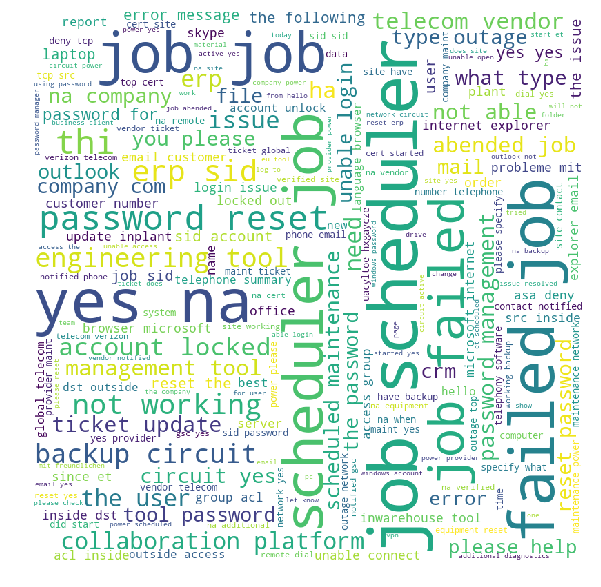

In [31]:
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(' '.join(tickets_df['CleanDescription']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [37]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(' '.join(tickets_df['Short description']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

TypeError: sequence item 2604: expected str instance, float found

In [19]:
import spacy
#print('spaCy Version: %s' % (spacy.__version__))
spacy_nlp = spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.